## **Pre-Processing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Configure pandas to display all columns
pd.set_option("display.max_columns", None)

df_cluster = pd.read_csv('bank_marketing_dataset.csv')

numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cluster.select_dtypes(include=['object']).columns
duration_col = ['duration']  # Column to log transform

df_cluster = df_cluster.drop(columns=['nr.employed', 'emp.var.rate'])

numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns

X_preprocessed_df = df_cluster.copy()
X_preprocessed_df['duration'] = np.log1p(df_cluster['duration'])

scaler = StandardScaler()
X_preprocessed_df[numerical_cols_c] = scaler.fit_transform(X_preprocessed_df[numerical_cols_c])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_preprocessed_df[categorical_cols]),
                                   columns=encoder.get_feature_names_out(categorical_cols),
                                   index=X_preprocessed_df.index)

X_no_encoded = X_preprocessed_df.copy()

X_preprocessed_df.drop(columns=categorical_cols, inplace=True)

X_preprocessed_df = pd.concat([X_preprocessed_df, X_cat_encoded], axis=1)

print(X_preprocessed_df.shape)

X_preprocessed_df.head()

(41188, 63)


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,1.533034,0.431124,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.628993,-0.177114,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.290186,0.274738,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.002309,-0.162669,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.533034,0.607534,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [2]:
prefixes = ['job_', 'marital_', 'education_', 'default_', 'housing_', 'loan_', 'contact_', 'month_', 'day_of_week_', 'poutcome_', 'subscribed_']
one_hot_cols = [col for col in X_preprocessed_df.columns if any(col.startswith(prefix) for prefix in prefixes)]

In [3]:
continuous_data = X_preprocessed_df.drop(columns=one_hot_cols, axis=1)

# **BIRCH Clustering**

In [5]:
n_clusters = [2, 3, 4, 5]
threshold = 0.5
branching_factor = 50


In [9]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

best_score = -1
best_params = {}

for n_cluster in n_clusters:
    birch = Birch(n_clusters=n_cluster, threshold=threshold, branching_factor=branching_factor)
    birch.fit(X_preprocessed_df)
    labels = birch.labels_
    score = silhouette_score(X_preprocessed_df, labels)
    if score > best_score:
        best_score = score
        best_params = {'n_clusters': n_cluster, 'threshold': threshold, 'branching_factor': branching_factor}

print("Best parameters:", best_params)


Best parameters: {'n_clusters': 2, 'threshold': 0.5, 'branching_factor': 50}


Fit the Model

In [10]:
from sklearn.cluster import Birch

# Instantiate the BIRCH model with the chosen parameters
birch_model = Birch(n_clusters=2, threshold=0.5, branching_factor=50)

# Fit the model to the preprocessed dataset
birch_model.fit(X_preprocessed_df)


Birch(n_clusters=2)

Cluster Assignment

In [11]:
cluster_labels = birch_model.predict(X_preprocessed_df)

# **Analysis Assignment**

In [13]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X_preprocessed_df, cluster_labels)
print("Silhouette Score:", silhouette)


Silhouette Score: 0.18709255030610372


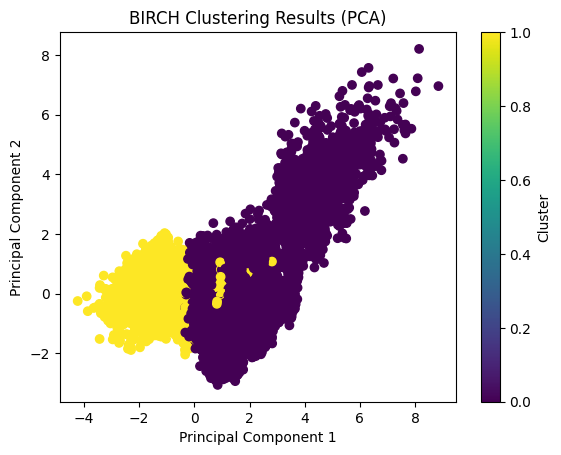

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality of the data to two dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed_df)

# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('BIRCH Clustering Results (PCA)')
plt.colorbar(label='Cluster')
plt.show()


# **With 4 Clusters - Version 2**

In [15]:
import pandas as pd
import numpy as np

import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode ,iplot

from sklearn.cluster import Birch

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
data = pd.read_csv('bank_marketing_dataset.csv')

In [17]:
df = data.copy()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [18]:
df.shape

(41188, 21)

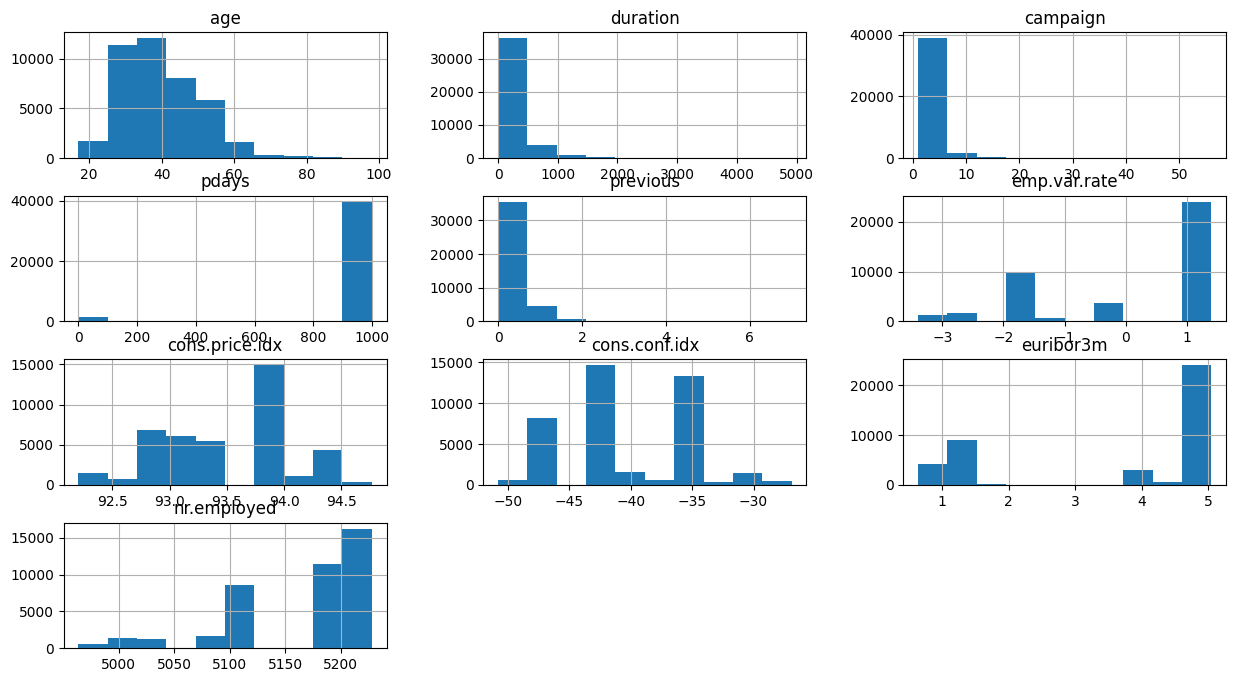

In [19]:
plt.rcParams["figure.figsize"] = (15, 8)
data.hist()
plt.show()

In [20]:
birch = Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=4, threshold=0.8)

In [23]:
X_train, X_test = train_test_split(X_preprocessed_df, test_size = 0.25, random_state = 100)

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)


In [39]:
model = birch.fit(X_train)

In [25]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

In [26]:
print(pred_test)
print(pred_train)

[0 1 1 ... 0 1 1]
[0 0 1 ... 1 1 0]


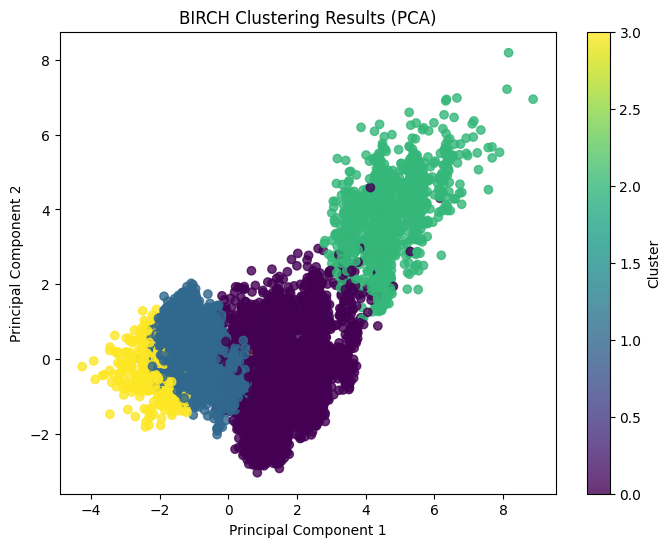

In [28]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot clusters in the reduced 2D space
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=pred_train, cmap='viridis', alpha=0.8)
plt.title('BIRCH Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


# Model Accuracy

In [33]:
from sklearn import metrics

Silhouette Score

In [29]:
score_silhouette_train = silhouette_score (X_train, pred_train)
score_silhouette_test = silhouette_score (X_test, pred_test)

In [30]:
print("--> TRAIN : For n_clusters = 4, silhouette score is {}".format(score_silhouette_train))
print("--> TEST : For n_clusters = 4, silhouette score is {}".format(score_silhouette_test))

--> TRAIN : For n_clusters = 4, silhouette score is 0.18875774065386794
--> TEST : For n_clusters = 4, silhouette score is 0.18826367525940912


Calinski Harabasz Score

In [34]:
score_calinski_train = metrics.calinski_harabasz_score(X_train, pred_train)
score_calinski_test = metrics.calinski_harabasz_score(X_test, pred_test)

In [35]:
print("--> TRAIN  : For n_clusters = 4, calinski_harabasz score is {}".format(score_calinski_train))
print("--> TEST  : For n_clusters = 4, calinski_harabasz score is {}".format(score_calinski_test))

--> TRAIN  : For n_clusters = 4, calinski_harabasz score is 3838.766044548256
--> TEST  : For n_clusters = 4, calinski_harabasz score is 1266.3774355485486


Davies Bouldin Score

In [36]:
score_davies_train = metrics.davies_bouldin_score(X_train, pred_train)
score_davies_test = metrics.davies_bouldin_score(X_test, pred_test)

In [37]:
print("--> TRAIN : For n_clusters = 4, davies_bouldin score is {}".format(score_davies_train))
print("--> TEST : For n_clusters = 4, davies_bouldin score is {}".format(score_davies_test))

--> TRAIN : For n_clusters = 4, davies_bouldin score is 1.7007765281058833
--> TEST : For n_clusters = 4, davies_bouldin score is 1.692018681304459
